In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings 
warnings.filterwarnings("ignore")

In [2]:
ds=pd.read_csv("C:/Users/floyd/data/bank_churn_data.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,NaN
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0


In [3]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             1
dtype: int64

In [4]:
ds.fillna(method='bfill',inplace=True)

In [5]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
ds.drop(['RowNumber','Surname','Geography'],axis='columns',inplace=True)

In [9]:
ds['Gender']=ds['Gender'].astype('category')
ds['Gender']=ds['Gender'].cat.codes

In [10]:
x=ds[[ 'CustomerId', 'CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y=ds[['Exited']]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_predict=model.predict(x_test)

In [14]:
model.score(x_test,y_test)

0.7975

In [15]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_predict)
confusion

array([[1595,    0],
       [ 405,    0]], dtype=int64)

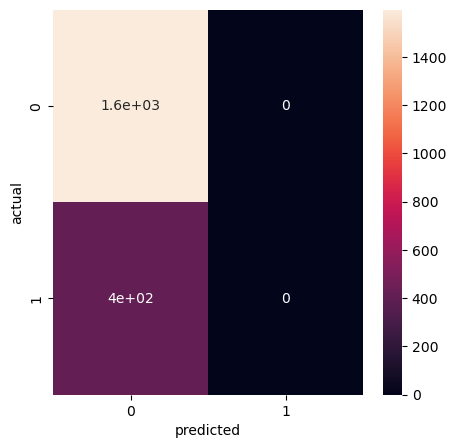

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1595
         1.0       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

